In [2]:
import numpy as np
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [42]:
file_path = r'C:\py-adult-data-analysis\data\adult.csv'
df = pd.read_csv(file_path)

df.replace('?', np.nan, inplace=True)
df_cleaned = df.dropna()


def check_salary_consistency(row):
    if row["salary"] == "<=50K" and row["salary K$"] <= 50:
        return True
    elif row["salary"] == ">50K" and row["salary K$"] > 50:
        return True
    return False


df_corrected = df_cleaned[df_cleaned.apply(check_salary_consistency, axis=1)]
df_corrected.head(10)


,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39
1,1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27
3,3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43
4,4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25
5,5,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K,44
6,6,49,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,<=50K,49
7,7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
8,8,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K,330
9,9,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K,303


In [41]:
df_corrected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      30162 non-null  int64 
 1   age             30162 non-null  int64 
 2   workclass       30162 non-null  object
 3   education       30162 non-null  object
 4   marital-status  30162 non-null  object
 5   occupation      30162 non-null  object
 6   relationship    30162 non-null  object
 7   race            30162 non-null  object
 8   sex             30162 non-null  object
 9   hours-per-week  30162 non-null  int64 
 10  native-country  30162 non-null  object
 11  salary          30162 non-null  object
 12  salary K$       30162 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


# Task 1
Print the count of men and women in the dataset.

In [43]:
gender_counts = df_corrected["sex"].value_counts()
print(gender_counts)

sex
Male      20380
Female     9782
Name: count, dtype: int64


# Task 2
Find the average age of men in dataset

In [44]:
print(df_corrected[df_corrected["sex"] == "Male"]["age"].mean())

39.18400392541707


# Task 3
Get the percentage of people from Poland (native-country)

In [60]:
poland_count = df_corrected[df_corrected["native-country"] == "Poland"]

total_count = len(df_corrected)

persentage = len(poland_count) / total_count * 100

print(f"The percentage of people from Poland: {persentage:.2f}%")

The percentage of people from Poland: 0.19%


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [62]:
mean_more_50k = df_corrected[df_corrected["salary"] == ">50K"]["age"].mean()
std_more_50k = df_corrected[df_corrected["salary"] == ">50K"]["age"].std()

mean_less_50k = df_corrected[df_corrected["salary"] == "<=50K"]["age"].mean()
std_less_50k = df_corrected[df_corrected["salary"] == "<=50K"]["age"].std()
print("mean_more_50k: ", mean_more_50k)
print("std_more_50k: ", std_more_50k)
print("mean_less_50k: ", mean_less_50k)
print("std_less_50k: ", std_less_50k)

mean_more_50k:  43.95911028236548
std_more_50k:  10.269632835673852
mean_less_50k:  36.60806038668668
std_less_50k:  13.464631257161633


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [64]:
higher_education = [
    "Bachelors",
    "Prof-school",
    "Assoc-acdm",
    "Assoc-voc",
    "Masters",
    "Doctorate",
]
without_higher_education_and_above_50k = df_corrected[
    (~df_corrected["education"].isin(higher_education))
    & (df_corrected["salary"] == ">50K")
]

without_higher_education_and_above_50k

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
7,7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
10,10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,116
55,55,43,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,341
67,67,53,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,40,United-States,>50K,225
68,68,49,Self-emp-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32462,32462,48,Self-emp-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,50,United-States,>50K,343
32518,32518,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,116
32519,32519,46,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,>50K,239
32557,32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [65]:
age_info_by_education = df_corrected.groupby("education")["age"]

age_info_by_education.describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [66]:
def categorize_married_status(status):
    if status.startswith("Married"):
        return "Married"
    else:
        return "Non-Married"


df_corrected["married_status_cleaned"] = df_corrected["marital-status"].apply(
    categorize_married_status
)
salary_comparison = (
    df_corrected[df_corrected["sex"] == "Male"]
    .groupby(["married_status_cleaned", "salary"])
    .size()
    .unstack()
)
print(salary_comparison)

salary                  <=50K  >50K
married_status_cleaned             
Married                  7052  5723
Non-Married              6932   673


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [69]:
max_hours_per_week = df_corrected["hours-per-week"].max()
print("max_hours_per_week: ", max_hours_per_week)

people_with_max_hours = df_corrected[
    df_corrected["hours-per-week"] == max_hours_per_week
].shape[0]

print("people_with_max_hours: ", people_with_max_hours)

max_hours_per_week:  99
people_with_max_hours:  78


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

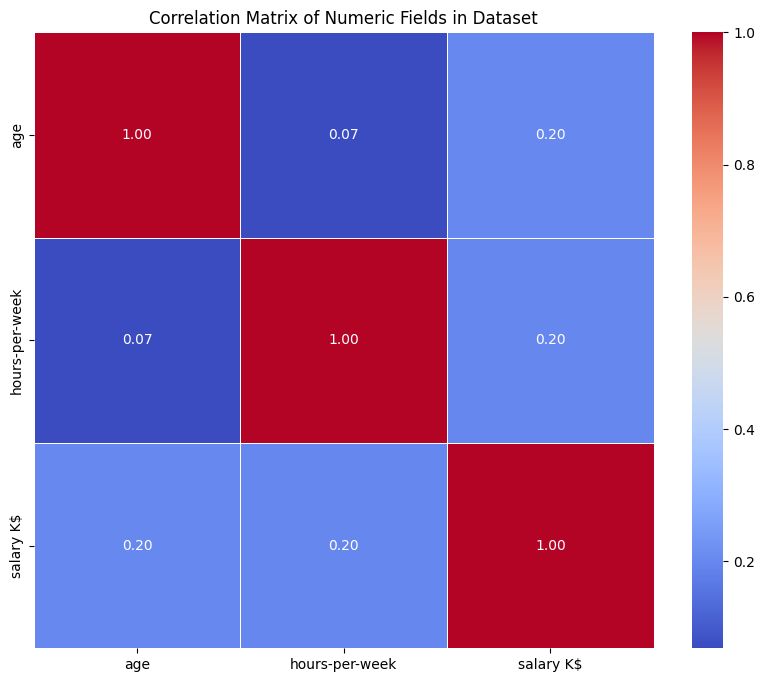

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ["age", "hours-per-week", "salary K$"]

df_2 = df[numeric_columns].apply(pd.to_numeric, errors="coerce").dropna()

correlation_matrix = df_2.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Fields in Dataset")
plt.show()